In [39]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')

In [40]:
#data.replace('?', np.nan, inplace= True)
data.replace('?', 0, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})
data.replace( np.nan,0 , inplace= True)

<Axes: xlabel='survived', ylabel='fare'>

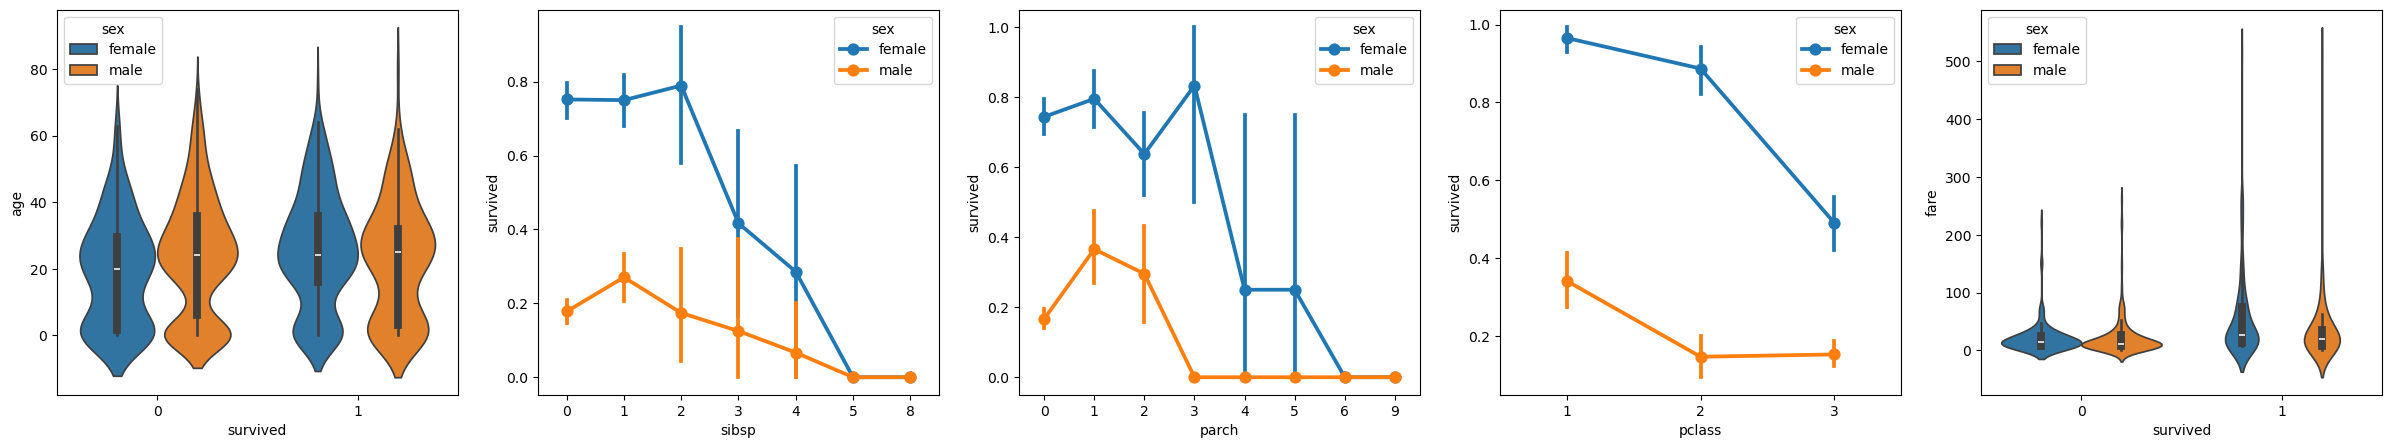

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [42]:
data.replace({'male': 1, 'female': 0}, inplace=True)

C:\Users\jthor\AppData\Local\Temp\ipykernel_18508\2851430834.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'male': 1, 'female': 0}, inplace=True)


In [43]:
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.036601
sibsp,0.027825
parch,0.082660
fare,0.244556
body,0.211795


In [44]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.036601
sibsp,0.027825
parch,0.082660
fare,0.244556
body,0.211795
relatives,0.201719


In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

In [46]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [47]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [48]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7748091603053435


In [49]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [50]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
33/33 [==============================] - 1s 1ms/step - loss: 0.6915 - accuracy: 0.6160
Epoch 2/50
33/33 [==============================] - 0s 1ms/step - loss: 0.6865 - accuracy: 0.6180
Epoch 3/50
33/33 [==============================] - 0s 2ms/step - loss: 0.6752 - accuracy: 0.6180
Epoch 4/50
33/33 [==============================] - 0s 2ms/step - loss: 0.6532 - accuracy: 0.6466
Epoch 5/50
33/33 [==============================] - 0s 2ms/step - loss: 0.6199 - accuracy: 0.7364
Epoch 6/50
33/33 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.7555
Epoch 7/50
33/33 [==============================] - 0s 2ms/step - loss: 0.5518 - accuracy: 0.7631
Epoch 8/50
33/33 [==============================] - 0s 2ms/step - loss: 0.5281 - accuracy: 0.7612
Epoch 9/50
33/33 [==============================] - 0s 2ms/step - loss: 0.5122 - accuracy: 0.7631
Epoch 10/50
33/33 [==============================] - 0s 2ms/step - loss: 0.5015 - accuracy: 0.7736
Epoch 11/50
33/33 [

In [53]:
from sklearn import metrics
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

9/9 [==============================] - 0s 2ms/step
0.7786259541984732
